In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## DATA PREPARATION

### LOAD DATA SET

In [1]:
df = pd.read_csv('C:/Users/User/Downloads/GP_DA/Global_Energy/Continent_Consumption_TWH.csv')

df.tail()

NameError: ignored

In [ ]:
#Check for missing values
print(df.isnull().sum())

Year             0
World            0
OECD             0
BRICS            0
Europe           0
North America    0
Latin America    0
Asia             0
Pacific          0
Africa           0
Middle-East      0
CIS              0
dtype: int64


In [ ]:
#Check for missing values
print(df.isnull().sum())

Year             0
World            0
OECD             0
BRICS            0
Europe           0
North America    0
Latin America    0
Asia             0
Pacific          0
Africa           0
Middle-East      0
CIS              0
dtype: int64


There are 0 duplicate values in the dataset

In [ ]:
#Delete certain columns except World 
columns_to_delete = ['OECD', 'BRICS', 'Europe', 'North America', 'Latin America', 'Asia', 'Pacific', 'Africa', 'Middle-East', 'CIS' ]
df = df.drop(columns_to_delete, axis=1)


# Rename the columns
new_column_names = {'World': 'World Power Consumption (TWh)'}
df = df.rename(columns=new_column_names)

df.head(3)

,Year,World Power Consumption (TWh)
0,1990,101855.54
1,1991,102483.56
2,1992,102588.23


In [ ]:
# convert to datetime format 
# Prophet only accept datetime format

df['Year'] = pd.to_datetime(df['Year'], format = '%Y')
df.tail()

,Year,World Power Consumption (TWh)
26,2016-01-01,159377.52
27,2017-01-01,162459.47
28,2018-01-01,166297.37
29,2019-01-01,167553.41
30,2020-01-01,160819.64


In [ ]:
#nformation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Year                           31 non-null     datetime64[ns]
 1   World Power Consumption (TWh)  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


In [ ]:
# Prophet's requirements: ds (the time column) and y (the metric column).

df = df.rename(columns = {'Year': 'ds', 'World Power Consumption (TWh)': 'y'})
df.head()

,ds,y
0,1990-01-01,101855.54
1,1991-01-01,102483.56
2,1992-01-01,102588.23
3,1993-01-01,103646.56
4,1994-01-01,104449.03


## DATA VISUALIZATION

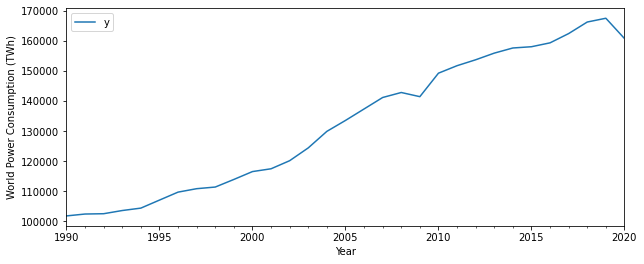

In [ ]:
# set the 'Year' column as the index of the DataFrame.
df.set_index("ds", inplace=True)


# Create the plot
df.plot(figsize=(10, 4))

# Set labels
plt.xlabel("Year")
plt.ylabel("World Power Consumption (TWh)")

# Display the plot
plt.show()      

## DATA MODELLING

In [ ]:
# !pip install prophet
# !pip install plotly


In [ ]:
from prophet import Prophet

In [ ]:
# reset the index to normal column
df = df.reset_index()
df.head()

,ds,y
0,1990-01-01,101855.54
1,1991-01-01,102483.56
2,1992-01-01,102588.23
3,1993-01-01,103646.56
4,1994-01-01,104449.03


In [ ]:
# set the uncertainty interval 
my_model = Prophet(interval_width=0.95)

# Fit the model to the data
my_model.fit(df)

12:25:58 - cmdstanpy - INFO - Chain [1] start processing
12:25:58 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Create a dataframe for future predictions

future_dates =  my_model.make_future_dataframe(periods = 100, freq = pd.DateOffset(years=1))
future_dates

,ds
0,1990-01-01
1,1991-01-01
2,1992-01-01
3,1993-01-01
4,1994-01-01
...,...
126,2116-01-01
127,2117-01-01
128,2118-01-01
129,2119-01-01


In [ ]:
# DataFrame of future dates is then used as input to the predict method of our fitted model
# ds: the datestamp of the forecasted value
# yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
# yhat_lower: the lower bound of our forecasts
# yhat_upper: the upper bound of our forecasts
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
126,2116-01-01,301383.661202,104754.705933,481128.137623
127,2117-01-01,315015.089069,112776.742207,499239.655699
128,2118-01-01,313545.501795,111062.267180,500962.864990
129,2119-01-01,311075.732302,105015.551395,501335.150613
130,2120-01-01,307612.565987,97063.606408,502248.543881


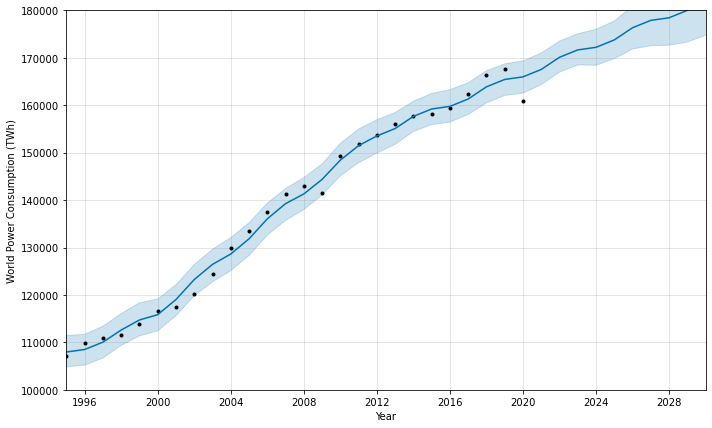

In [ ]:
# Plot the forecasted data + actual 
my_model.plot(forecast, xlabel="Year", ylabel="World Power Consumption (TWh)")
plt.xlim(pd.to_datetime('1995'), pd.to_datetime('2030'))
plt.ylim(100000, 180000)
plt.show()

Text(40.75, 0.5, 'World Power Consumption (TWh)')

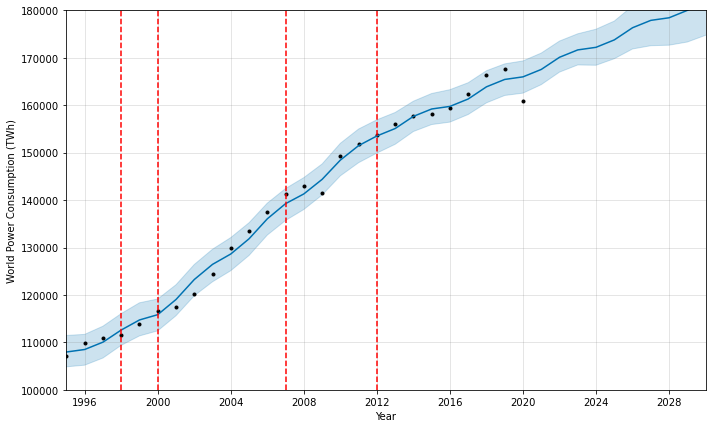

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)


plt.xlim(pd.to_datetime('1995'), pd.to_datetime('2030'))
plt.ylim(100000, 180000)
plt.xlabel("Year")
plt.ylabel("World Power Consumption (TWh)")


## MODEL EVALUATION

In [ ]:
# Perform cross-validation
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

df_cv = cross_validation(my_model, initial='1095 days', period='547 days', horizon = '730 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res.head()

  0%|          | 0/17 [00:00<?, ?it/s]12:26:00 - cmdstanpy - INFO - Chain [1] start processing
12:26:13 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 1/17 [00:13<03:33, 13.37s/it]12:26:13 - cmdstanpy - INFO - Chain [1] start processing
12:26:22 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▏        | 2/17 [00:22<02:39, 10.61s/it]12:26:22 - cmdstanpy - INFO - Chain [1] start processing
12:26:31 - cmdstanpy - INFO - Chain [1] done processing
 18%|█▊        | 3/17 [00:31<02:18,  9.86s/it]12:26:31 - cmdstanpy - INFO - Chain [1] start processing
12:26:41 - cmdstanpy - INFO - Chain [1] done processing
 24%|██▎       | 4/17 [00:41<02:09,  9.93s/it]12:26:41 - cmdstanpy - INFO - Chain [1] start processing
12:26:41 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▉       | 5/17 [00:41<01:17,  6.48s/it]12:26:41 - cmdstanpy - INFO - Chain [1] start processing
12:26:52 - cmdstanpy - INFO - Chain [1] done processing
 35%|███▌      | 6/17 [00:52<01:26,  7.91s/it]12:26:52

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,173 days,2.470080e+06,1571.648799,1372.584312,0.012208,0.016996,0.012211,0.666667
1,175 days,1.340956e+06,1157.996701,852.403089,0.007304,0.002423,0.007355,0.666667
2,176 days,5.116862e+06,2262.048079,1497.188224,0.010657,0.002423,0.010536,0.666667
3,178 days,5.371770e+06,2317.707959,1707.329007,0.011873,0.006073,0.011746,0.666667
4,180 days,6.514052e+06,2552.264083,2231.026833,0.015078,0.011899,0.014927,0.666667


In [ ]:
# !pip install scikit-learn
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = np.array(df_cv.y)
y_pred = np.array(df_cv.yhat)

mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)

print("RMSE:",rmse, "TWh")

c:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RMSE: 3152.163799385148 TWh


In [ ]:
# Calculate R-squared
ss_total = np.sum((df_cv['y'] - df_cv['y'].mean()) ** 2)
ss_residual = np.sum((df_cv['y'] - df_cv['yhat']) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f"R-squared value: {r2}")

R-squared value: 0.9742389080798328
